<a href="https://colab.research.google.com/github/lineality/DS-Unit-2-Kaggle-Challenge/blob/master/module1/GGA_2_2_1_v4_assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


# Notes and Plan

## Splits
The data has been split into a test set and a training set already, but not into train-validation sets. So the existing training set should be one further split into a training and a validation set. 

## Tasks
Define a function to wrangle (train, validate, and test) sets in the same way: 
 
-  1. Clean outliers and engineer features. (For example, what other columns have zeros and shouldn't? 
(construction year ...probably shouldn't be zero...but some structure are old...)
 
- 2. What other columns are duplicates, or nearly duplicates? 
 
- 3. Can you extract the year from date_recorded? 
 
- 4. (Can you) engineer new features, 
 (such as the number of years from waterpump construction to waterpump inspection?)
 
- 5. Select features. 
 
 ### Use a scikit-learn pipeline to:
 - 6. encode categoricals, 
 - 7. impute missing values, and 
 - 8. fit a decision tree classifier.
 - 9. Get your validation accuracy score.
 - 10. Get and plot your feature importances.

#"Dictionary" of header meanings

https://www.kaggle.com/c/ds8-predictive-modeling-challenge/data

    amount_tsh : Total static head (amount water available to waterpoint)
    date_recorded : The date the row was entered
    funder : Who funded the well
    gps_height : Altitude of the well
    installer : Organization that installed the well
    longitude : GPS coordinate
    latitude : GPS coordinate
    wpt_name : Name of the waterpoint if there is one
    num_private :
    basin : Geographic water basin
    subvillage : Geographic location
    region : Geographic location
    region_code : Geographic location (coded)
    district_code : Geographic location (coded)
    lga : Geographic location
    ward : Geographic location
    population : Population around the well
    public_meeting : True/False
    recorded_by : Group entering this row of data
    scheme_management : Who operates the waterpoint
    scheme_name : Who operates the waterpoint
    permit : If the waterpoint is permitted
    construction_year : Year the waterpoint was constructed
    extraction_type : The kind of extraction the waterpoint uses
    extraction_type_group : The kind of extraction the waterpoint uses
    extraction_type_class : The kind of extraction the waterpoint uses
    management : How the waterpoint is managed
    management_group : How the waterpoint is managed
    payment : What the water costs
    payment_type : What the water costs
    water_quality : The quality of the water
    quality_group : The quality of the water
    quantity : The quantity of water
    quantity_group : The quantity of water
    source : The source of the water
    source_type : The source of the water
    source_class : The source of the water
    waterpoint_type : The kind of waterpoint
    waterpoint_type_group : The kind of waterpoint

Labels

There are three possible values:

    functional : the waterpoint is operational and there are no repairs needed
    functional needs repair : the waterpoint is operational, but needs repairs
    non functional : the waterpoint is not operational


# Begin Code


In [0]:
import numpy as np

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

In [0]:
#labels

#Split

In [0]:
# Split train into train & val
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.85, test_size=0.15, 
                              stratify=train['status_group'], random_state=42)

In [0]:
train.shape, test.shape, val.shape

((50490, 40), (14358, 39), (8910, 40))

In [0]:
train.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.006067,-0.008333,0.002698,-0.000636,-0.002816,-0.002018,-0.001286,-0.003357,-0.002356
amount_tsh,-0.006067,1.000000,0.074935,0.012355,-0.047083,0.002851,-0.025676,-0.022329,0.016440,0.006400
gps_height,-0.008333,0.074935,1.000000,-0.020816,0.024763,0.005380,-0.181750,-0.170453,0.132975,-0.007791
longitude,0.002698,0.012355,-0.020816,1.000000,-0.297477,0.042657,0.143405,0.252783,0.061447,0.027207
latitude,-0.000636,-0.047083,0.024763,-0.297477,1.000000,0.010397,-0.241367,-0.193212,0.002163,0.038865
num_private,-0.002816,0.002851,0.005380,0.042657,0.010397,1.000000,-0.018903,-0.003340,0.005064,-0.001406
region_code,-0.002018,-0.025676,-0.181750,0.143405,-0.241367,-0.018903,1.000000,0.680817,0.091983,-0.007816
district_code,-0.001286,-0.022329,-0.170453,0.252783,-0.193212,-0.003340,0.680817,1.000000,0.060692,0.008659
population,-0.003357,0.016440,0.132975,0.061447,0.002163,0.005064,0.091983,0.060692,1.000000,0.033606
construction_year,-0.002356,0.006400,-0.007791,0.027207,0.038865,-0.001406,-0.007816,0.008659,0.033606,1.000000


# Exploration and Progression:

We will start with a basic set of processes and model, and then refine.

In [0]:
train.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
26290,3267,0.0,2011-04-12,NaN,0,NaN,34.108531,-8.787551,Kwa Mzee Ng'Wandu,0,Rufiji,Mahelele,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59373,15233,5000.0,2013-01-30,Rudep,1137,Distri,32.125024,-6.784358,Kwa Kadiega,0,Lake Rukwa,Mapambano,Rukwa,15,1,Mpanda,Ilela,96,True,GeoData Consultants Ltd,VWC,NaN,True,1988,india mark ii,india mark ii,handpump,vwc,user-group,pay annually,annually,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional


In [0]:
import pandas_profiling

In [0]:
train.isna().sum()

In [0]:
pandas_profiling.ProfileReport(train)

Number of variables,41
Number of observations,50490
Total Missing (%),2.9%
Total size in memory,15.8 MiB
Average record size in memory,328.0 B
Numeric,11
Categorical,29
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [0]:
#rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [0]:
#Gives basic statistics
# Describes the Numeric Collumns
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,50490.000000,50490.000000,50490.000000,48962.000000,48962.000000,50490.000000,50490.000000,50490.000000,50490.000000,32892.000000
mean,37069.307784,322.693373,669.196990,35.145601,-5.883681,0.475758,15.240800,5.617469,179.522222,1996.823361
std,21432.361643,3144.712330,693.581479,2.604619,2.807108,12.987827,17.479831,9.618303,477.442796,12.476815
min,0.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18491.250000,0.000000,0.000000,33.281357,-8.638206,0.000000,5.000000,2.000000,0.000000,1988.000000
50%,37000.500000,0.000000,371.000000,35.004509,-5.169179,0.000000,12.000000,3.000000,25.000000,2000.000000
75%,55542.500000,25.000000,1321.000000,37.221345,-3.373638,0.000000,17.000000,5.000000,214.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.344301,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [0]:
# This tells you how many different non-numeric variables there are, e.g. if they are binary or nearly so.
# different summary
# Describes non-numeric collumns
train.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,50490,47391,47376,50490,50490,50181,50490,50490,50490,47672,50490,47190,26534,47893,50490,50490,50490,50490,50490,50490,50490,50490,50490,50490,50490,50490,50490,50490,50490,50490,50490
unique,350,1771,1995,32384,9,17781,21,124,2086,2,1,12,2597,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-17,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,495,7760,14823,3056,8671,434,4520,2134,270,43384,50490,31307,577,32998,22796,22796,22796,34450,44664,21520,21520,43157,43157,28188,28188,14492,14492,38949,24230,29365,27420


## Observations:
GPS should and lat/long and year should not be zero

will be replaced with NaN



In [0]:
train.isna().sum()

## Wrangle-Function

To make changes to all data-sets in like fashion

In [0]:
def wrangle(X):
  """Wrangle train, validate, and test sets in the same way"""
    
  # Prevent SettingWithCopyWarning
  X = X.copy()
    
  # About 3% of the time, latitude has small values near zero,
  # outside Tanzania, so we'll treat these values like zero.
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  # When columns have zeros and shouldn't, they are like null values.
  # So we will replace the zeros with nulls, and impute missing values later.
  cols_with_zeros = ['longitude', 'latitude', 'construction_year']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)

  # quantity & quantity_group are duplicates, so drop one
  X = X.drop(columns='quantity_group')

  #region code and district code are very similar according to .corr
  #X = X.drop(columns='region_code')
  # drop ID number

  # return the wrangled dataframe
  return X

In [0]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# First model before tuning parameters

In [0]:

from sklearn.tree import DecisionTreeClassifier

# These are the only two changes from the previous code cell:
# Remove StandardScaler (it's not needed or helpful for trees)
# Change the model from LogisticRegression to DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=42)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, val
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Train Accuracy 0.9955040602099425
Validation Accuracy 0.7584736251402918


In [0]:
train.groupby('quantity')['status_group'].value_counts(normalize=True)

quantity      status_group           
dry           non functional             0.967497
              functional                 0.026421
              functional needs repair    0.006082
enough        functional                 0.651483
              non functional             0.276359
              functional needs repair    0.072158
insufficient  functional                 0.521753
              non functional             0.381948
              functional needs repair    0.096300
seasonal      functional                 0.578886
              non functional             0.320476
              functional needs repair    0.100638
unknown       non functional             0.712593
              functional                 0.268148
              functional needs repair    0.019259
Name: status_group, dtype: float64

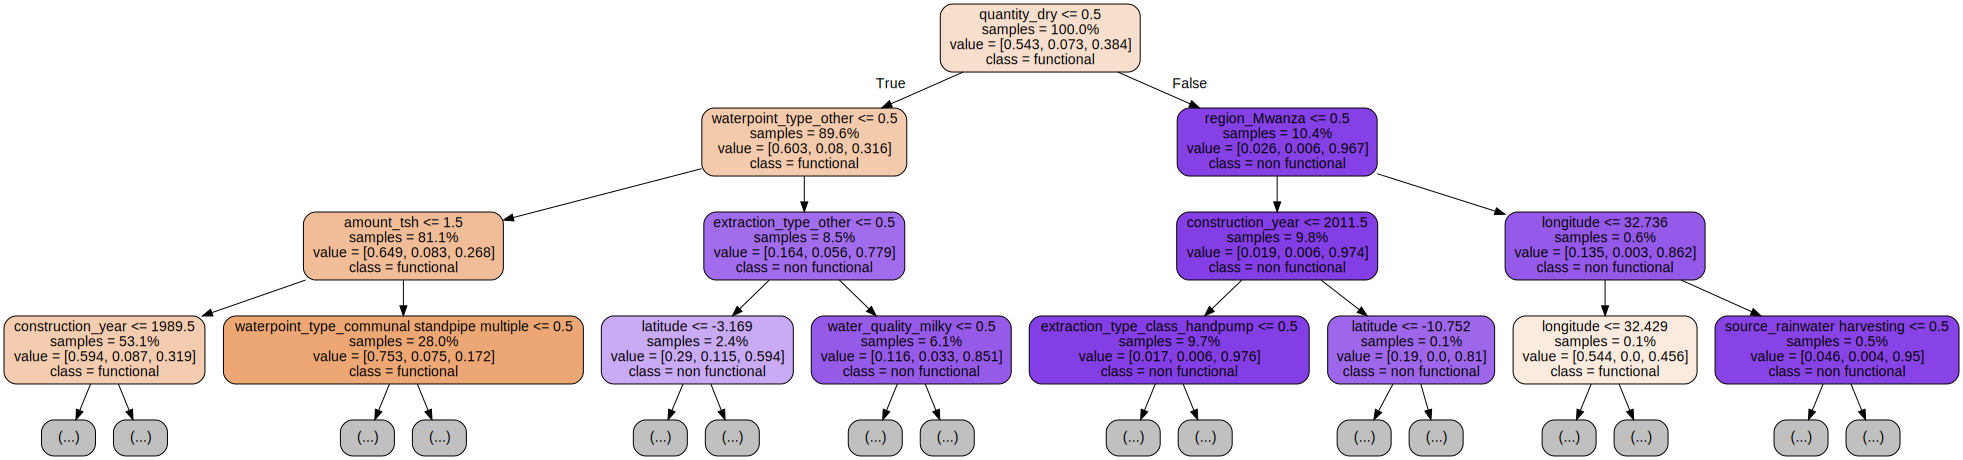

In [0]:
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

Q: export model to use on test...results?

## min_samples_leaf / munimum node size returns the best validation at: 4
validation score: .772

In [0]:

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.8903743315508021
Validation Accuracy 0.7720538720538721


## Experimenting with Max_Depth, 16 seems the best

In [0]:
# Or similarly, we can decrease the depth of the tree

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=16, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.8472172707466825
Validation Accuracy 0.7749719416386083


class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)


# Both Depth & Minumum Node size

So far the best validation accuracy is .775

In [0]:
# Increase "minimum node size" / min_samples_leaf, to reduce model complexity,
# This happens to improve validation accuracy here.

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=16, min_samples_leaf=4, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.8249356308179837
Validation Accuracy 0.7749719416386083


In [0]:
# Predict on test
y_pred = pipeline.predict(X_test)

In [0]:
sample_submission['status_group'] = pipeline.predict(X_test)

In [0]:
y_pred.shape

(14358,)

In [0]:
sample_submission.shape

(14358, 2)

In [0]:
sample_submission.describe(exclude='number')

,status_group
count,14358
unique,3
top,functional
freq,8758


In [0]:
sample_submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [0]:
submission = sample_submission

In [0]:
submission['status_group'] = y_pred

In [0]:
submission.head(2)

,id,status_group
0,50785,functional
1,51630,functional


In [0]:
submission.describe(exclude='number')


,status_group
count,14358
unique,3
top,functional
freq,8758


In [0]:
from google.colab import files

In [0]:
submission.to_csv('submission_GGA3.csv', index=False)

In [0]:
files.download('submission3_GGA.csv')

In [0]:
!ls

sample_data  submission2_GGA.csv  submission_GGA3.csv  submission_GGA.csv


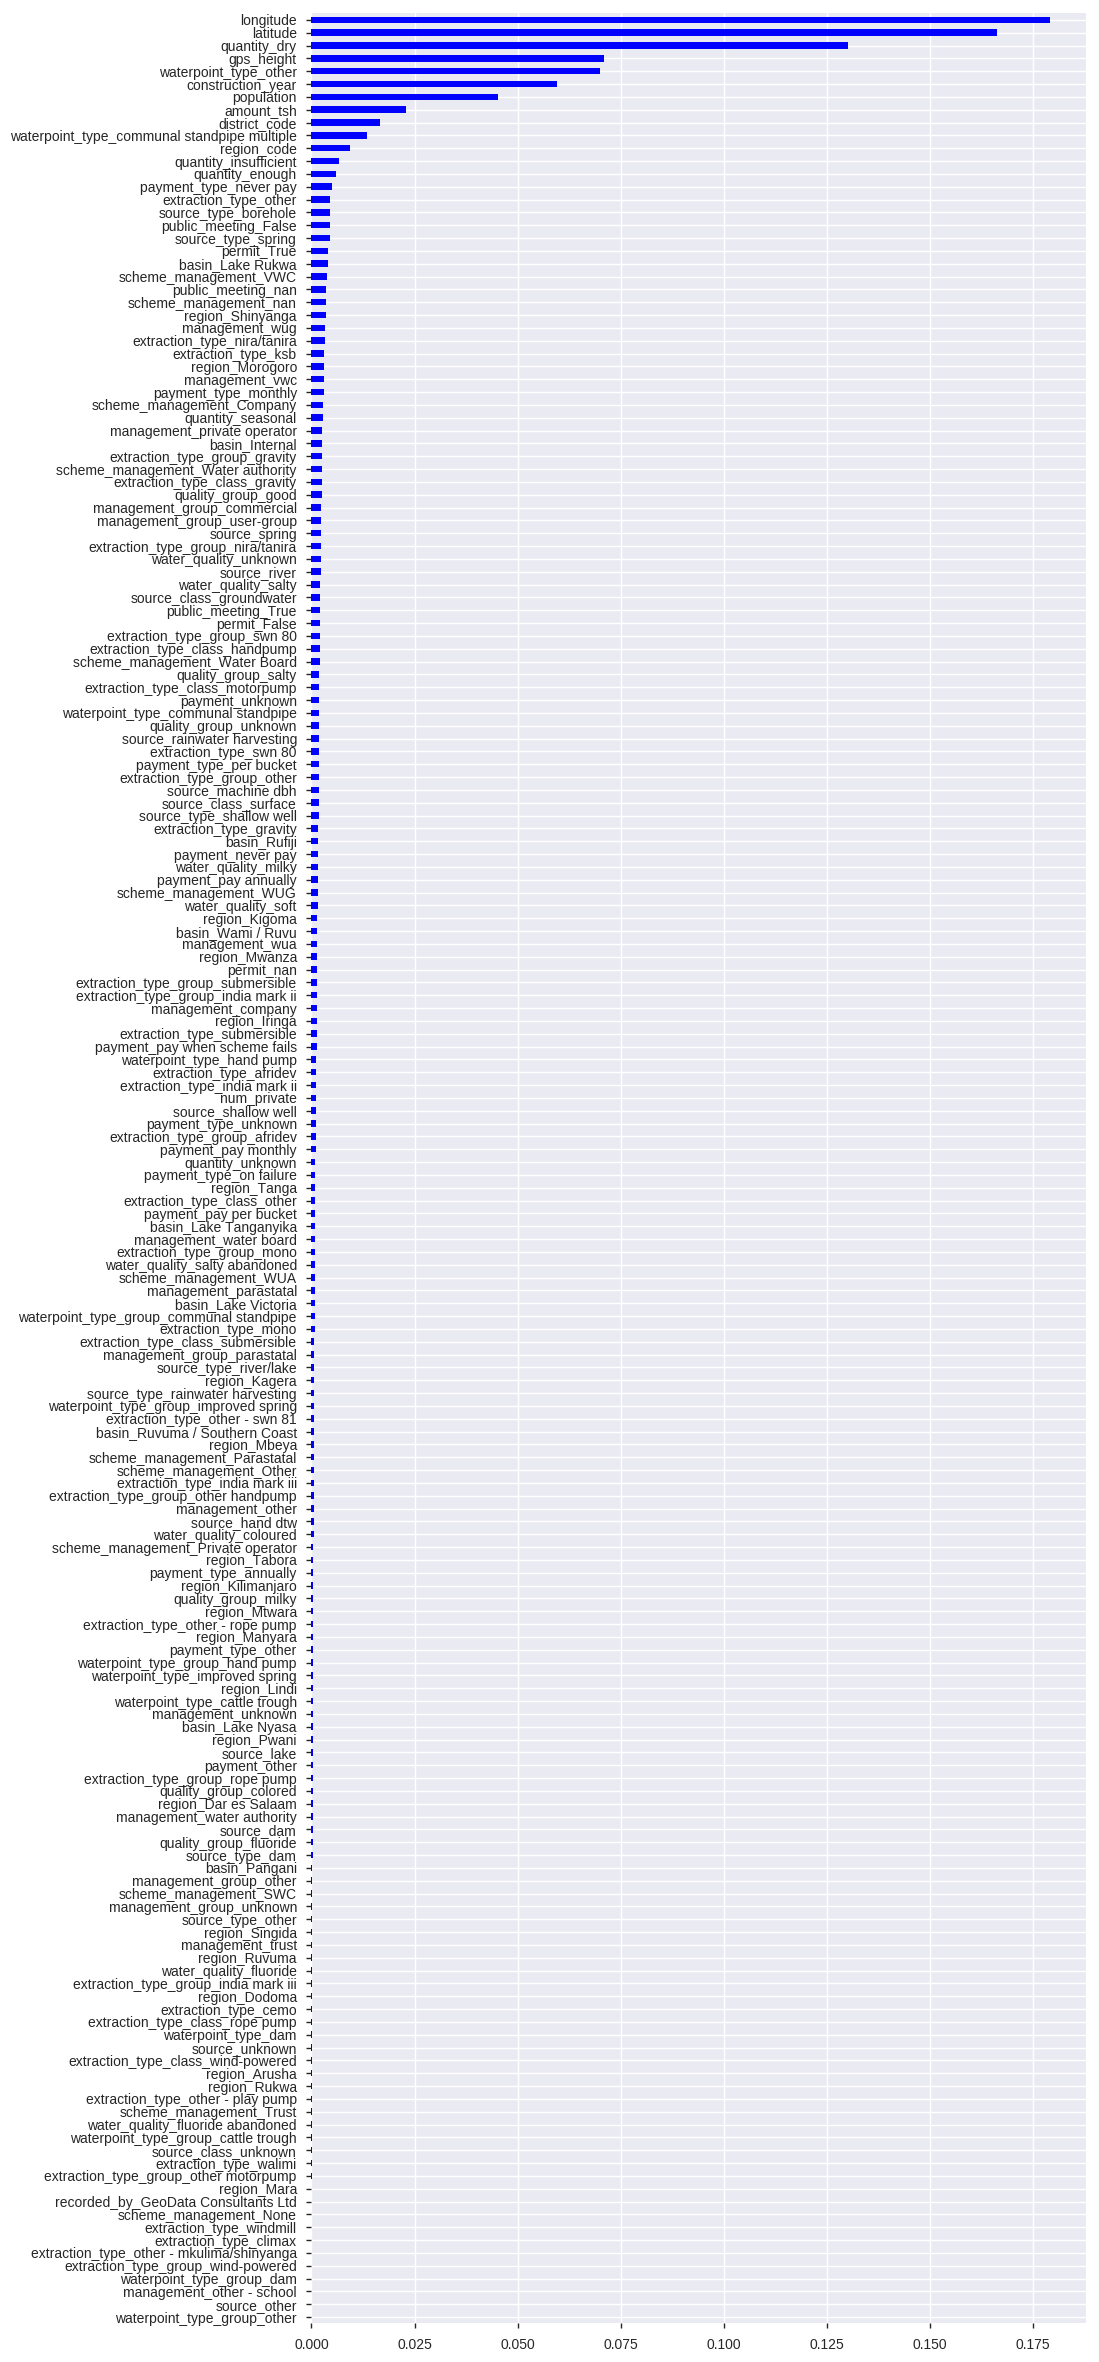

In [0]:
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='blue');